In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#CALL gds.pageRank.stream({nodeProjection:'*',relationshipProjection:'*'}) YIELD nodeId, score
#        WITH gds.util.asNode(nodeId) as node, score
#        WHERE node:Officer AND node.sourceID STARTS WITH "Pandora Papers"
#        WITH * ORDER BY score DESC LIMIT 10
#        MATCH ()<-[r:officer_of]-(o:Officer)
#        RETURN o.name, count(o) AS count, r.link as relationship
#        ORDER BY count DESC

Below is a data frame of the most important officers 

In [2]:
data = pd.read_csv('data/export.csv')
data

,o.name,count,relationship
0,THE BEARER,709480,shareholder of
1,Portcullis TrustNet (BVI) Limited,362380,records & registers of
2,EL PORTADOR,93260,shareholder of
3,Portcullis TrustNet (Samoa) Limited,56410,shareholder of
4,MOSSFON SUBSCRIBERS LTD.,39590,shareholder of
...,...,...,...
764213,CHERRY ROOSTANDY,10,director of
764214,CHERRY ROOSTANDY,10,judicial representative of
764215,RETO STUTZ,10,shareholder of
764216,DANIEL ZIMMERMANN,10,shareholder of


Notice The bearer is absurdly high 

In [3]:
print(data['o.name'].nunique())
print(data['relationship'].nunique())

523500
516


In [4]:
rels = data.groupby(['relationship']).sum().sort_values(by = 'count',ascending=False)
rels

,count
relationship,
shareholder of,5834380
director of,4525400
secretary of,1121920
judicial representative of,1095260
legal representative of,991810
...,...
director/treasurer,10
director/proxy of,10
director/president,10


<AxesSubplot:xlabel='relationship', ylabel='count'>

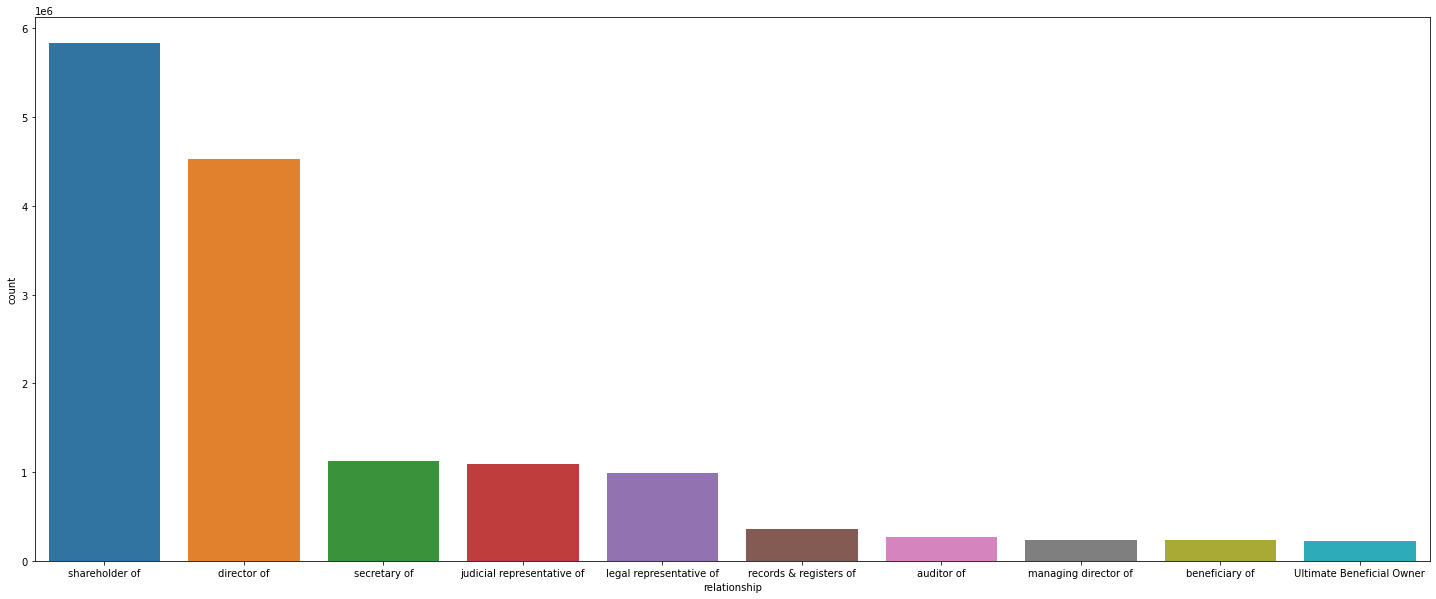

In [5]:
plt.figure(figsize=(25,10))
sns.barplot(x=rels.index[:10],y='count',data=rels[:10])